# <em>Airline Sentiment Analysis</em>: 


## <u>Project Member</u>:
### Subhadeep Roy (A20358508)

## <u>Project Description</u>:
### A sentiment analysis classification about the problems of each major U.S. airline reported by various customers on Twitter.
### Phase2 : Perform supervised learning on your data, perform model selection, report results, and print/discuss important features for domain

In [69]:
# Import File and Packages
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")

# Read csv file into data frame
tweet=pd.read_csv("./data/Tweets.csv")

### Load and preprocess data using NLTK:
##### Tokenize, Clean, Stem, Lemmatize, Remove stopwords

In [70]:
# Preprocess the data {'negative': 0 , 'positive': 1 , 'neutral': 2}

df=tweet.iloc[:,(10,1)]
df.columns = ['data', 'target']
df['target']=df['target'].str.strip().str.lower()
df['target']=df['target'].map({'negative': 0 , 'positive': 1 , 'neutral': 2})

# Copy df to a temporary dataframe for pre-processing
# Below assignment is causing problems
dft=df

In [71]:
# Remove @tweets, numbers, hyperlinks that do not start with letters
dft['data']=dft['data'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])"," ")

# tokenize into words
import nltk
dft['data']=dft['data'].apply(nltk.word_tokenize)

In [72]:
# stem the tokens
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
dft['data']=dft['data'].apply(lambda x: [stemmer.stem(y) for y in x])

In [73]:
# Lemmatizing
lemmatizer = nltk.WordNetLemmatizer()
dft['data']=dft['data'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [74]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

# stem the stopwords
stemmed_stops = [stemmer.stem(t) for t in stopwords]

# remove stopwords from stemmed/lemmatized tokens
dft['data']=dft['data'].apply(lambda x: [stemmer.stem(y) for y in x if y not in stemmed_stops])

# remove words whose length is <3
dft['data']=dft['data'].apply(lambda x: [e for e in x if len(e) >= 3])

In [75]:
# Detokenize cleaned dataframe for vectorizing
dft['data']=dft['data'].str.join(" ")

### Printing data shape:

In [76]:
#Print attributes of tweet, X and y
print('Shape of original file : ', tweet.shape)
print('All columns of the original file : ', tweet.columns.tolist() , '\n')
print('Columns dft dataframe : ',dft.columns.tolist(), '\n') 
print('Shape data and target : ', dft['data'].shape, dft['target'].shape, '\n')
print('Mood Count target :\n',tweet['airline_sentiment'].value_counts())

Shape of original file :  (14640, 15)
All columns of the original file :  ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'] 

Columns dft dataframe :  ['data', 'target'] 

Shape data and target :  (14640,) (14640,) 

Mood Count target :
 negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


### Printing accuracy of Naive Bayes model using Train Test Split:
#### Performance Measure: Accuracy_score and runtime  
##### Testing the dataset using Naive Bayes classifier and train test. Purpose is to find an optimum random state for train test which gives the best accuracy.

In [77]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

#Tfid shows less accuracy
#from sklearn.feature_extraction.text import TfidfVectorizer

X=dft['data']
y=dft['target']

arr_Accu=[]

#Using train_test_split
#Selecting the best random state and comapring the accuracy using Naive Bayes
for i in range(1,20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=i)

    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    feat_dtm = vect.get_feature_names()
    #feat_dtm

    clf = MultinomialNB()
    clf.fit(X_train_dtm, y_train)
    y_pred = clf.predict(X_test_dtm)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    #print(accuracy)
    arr_Accu.append(accuracy)

for j in range(1,20):
    print("Random State : ", j, "   Accuracy : ", arr_Accu[j-1])
    
#Random state comes best for the value 11 which is 0.77

Random State :  1    Accuracy :  0.755380794702
Random State :  2    Accuracy :  0.753311258278
Random State :  3    Accuracy :  0.757864238411
Random State :  4    Accuracy :  0.752897350993
Random State :  5    Accuracy :  0.75434602649
Random State :  6    Accuracy :  0.759933774834
Random State :  7    Accuracy :  0.751241721854
Random State :  8    Accuracy :  0.756829470199
Random State :  9    Accuracy :  0.760140728477
Random State :  10    Accuracy :  0.756001655629
Random State :  11    Accuracy :  0.762210264901
Random State :  12    Accuracy :  0.758899006623
Random State :  13    Accuracy :  0.757864238411
Random State :  14    Accuracy :  0.753518211921
Random State :  15    Accuracy :  0.753932119205
Random State :  16    Accuracy :  0.756829470199
Random State :  17    Accuracy :  0.765314569536
Random State :  18    Accuracy :  0.757864238411
Random State :  19    Accuracy :  0.752483443709


### Printing accuracy of Naive Bayes model using K-fold:
#### Performance Measure: Accuracy_score and runtime
##### Testing the dataset using Naive Bayes classifier and K-fold. Purpose is to find an optimum K value for CV which gives the best accuracy.

In [78]:
#Using K-fold validation
#Selecting the best fold and comparing the accuracy using Naive Bayes
from sklearn.cross_validation import cross_val_score
arr_Accu=[]

#Using train_test_split
#Selecting the best random state and comparing the accuracy using Naive Bayes
for i in range(3,15):

    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    X_dtm = vect.fit_transform(X)

    clf = MultinomialNB()
    accuracy = cross_val_score(clf, X_dtm, y, cv=i, scoring='accuracy')
    
    arr_Accu.append(np.mean(accuracy))

#print(arr_Accu)
for j in range(3,15):
    print("K-Fold : ", j, "   Accuracy : ", arr_Accu[j-3])

#K-fold comes best for the cv 13 which is 0.7474

K-Fold :  3    Accuracy :  0.734427691707
K-Fold :  4    Accuracy :  0.728893972272
K-Fold :  5    Accuracy :  0.739416835276
K-Fold :  6    Accuracy :  0.737570515005
K-Fold :  7    Accuracy :  0.738118243238
K-Fold :  8    Accuracy :  0.738458870197
K-Fold :  9    Accuracy :  0.743378902215
K-Fold :  10    Accuracy :  0.740096137419
K-Fold :  11    Accuracy :  0.74522010512
K-Fold :  12    Accuracy :  0.740167683344
K-Fold :  13    Accuracy :  0.747405225591
K-Fold :  14    Accuracy :  0.740784396657


### Print top features with frequency:

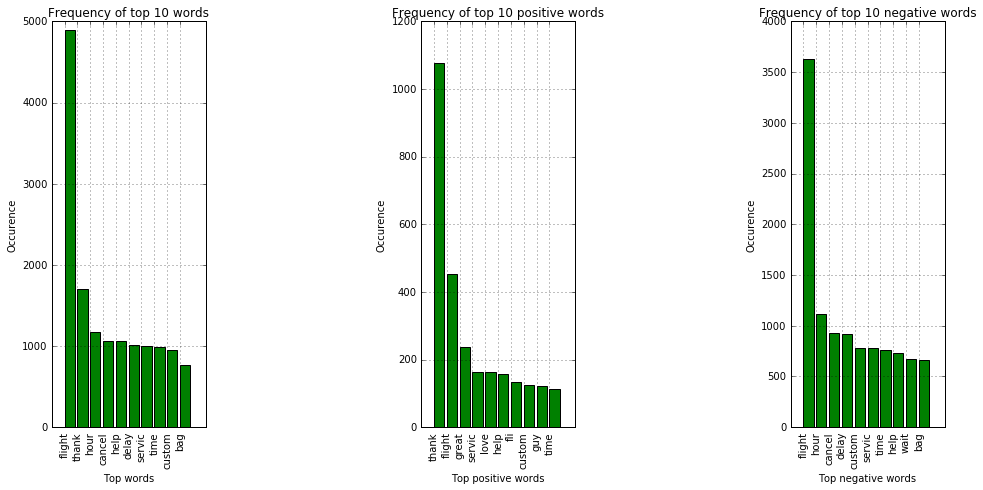

In [79]:
def print_top_words():    
    # Print top words
    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    data_dtm = vect.fit_transform(dft['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_neg_words():    
    # Print top negative words
    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    filt = dft[dft['target'] == 0]
    data_dtm = vect.fit_transform(filt['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top negative words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top negative words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 negative words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_pos_words():    
    # Print top positive words
    vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
    filt = dft[dft['target'] == 1]
    data_dtm = vect.fit_transform(filt['data'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top positive words
    topt = freq_tbl.sort(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top positive words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 positive words')
    plt.xticks(X,topt['Word'],rotation=90)


plt.figure(1,figsize=(16, 16))
plt.subplot(251)
print_top_words()  
plt.subplot(253)
print_top_pos_words()
plt.subplot(255)
print_top_neg_words()

### Comparing different model accuracy using Train Test:
#### 1. Multinomial Naive Bayes
#### 2. Logistic Regression
#### 3. KNN
#### 4. Decision Tree
#### 5. Random Forest
#### 6. ADA Boost
#### 7. SVC
#### 8. Gaussian Naive Bayes
### Performance Measure: Accuracy_score and runtime
##### Each model mentioned above will be tested for accuracy and runtime using Train Test and the best performing model will be automatically selected.

In [80]:
#Train test performs better than k-fold.
import time
#Train Test split data with random state=11
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=11)

#Vectorize
vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
feat_dtm = vect.get_feature_names()

#Initialize classifier stats
clf_stats=pd.DataFrame()

In [81]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

start_time=time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'Multinomial Naive Bayes', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = MultinomialNB()'}, ignore_index=True)

Accuracy :  0.762210264901


In [82]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

start_time=time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'Logistic Regression', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = LogisticRegression()'}, ignore_index=True)

Accuracy :  0.770281456954


In [83]:
#K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

start_time=time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'KNN', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = KNeighborsClassifier(n_neighbors=2)'}, ignore_index=True)

Accuracy :  0.604718543046


In [84]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

start_time=time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'Decision Trees', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = DecisionTreeClassifier(criterion=''entropy'')'}, ignore_index=True)

Accuracy :  0.688120860927


In [85]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy')

start_time=time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'Random Forest', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = RandomForestClassifier(criterion=''entropy'')'}, ignore_index=True)

Accuracy :  0.729304635762


In [86]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

start_time=time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'ADA Boost', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = AdaBoostClassifier()'}, ignore_index=True)

Accuracy :  0.693087748344


In [87]:
#SVM SVC
from sklearn.svm import SVC
clf = SVC()

start_time=time.time()
clf.fit(X_train_dtm, y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm)
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'SVM SVC', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = SVC()'}, ignore_index=True)

Accuracy :  0.626448675497


In [88]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

start_time=time.time()
clf.fit(X_train_dtm.toarray(), y_train)
runtime = time.time()-start_time
y_pred = clf.predict(X_test_dtm.toarray())
accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy : ',accuracy)

#Store stats for classifier
clf_stats=clf_stats.append({'Classifier': 'Gaussian NB', 'Accuracy': accuracy, 'Runtime': runtime, 'Callable': 'clf = GaussianNB()'}, ignore_index=True)

Accuracy :  0.378518211921


### Plotting Classifier vs Accuracy and Runtime:

                Classifier  Accuracy    Runtime
1      Logistic Regression  0.770281   0.486318
0  Multinomial Naive Bayes  0.762210   0.015633
4            Random Forest  0.729305   4.336211
5                ADA Boost  0.693088   1.193703
3           Decision Trees  0.688121   3.779736
6                  SVM SVC  0.626449  21.084768
2                      KNN  0.604719   0.000000
7              Gaussian NB  0.378518   2.412319


([<matplotlib.axis.XTick at 0x1dd1176d160>,
 <a list of 8 Text xticklabel objects>)

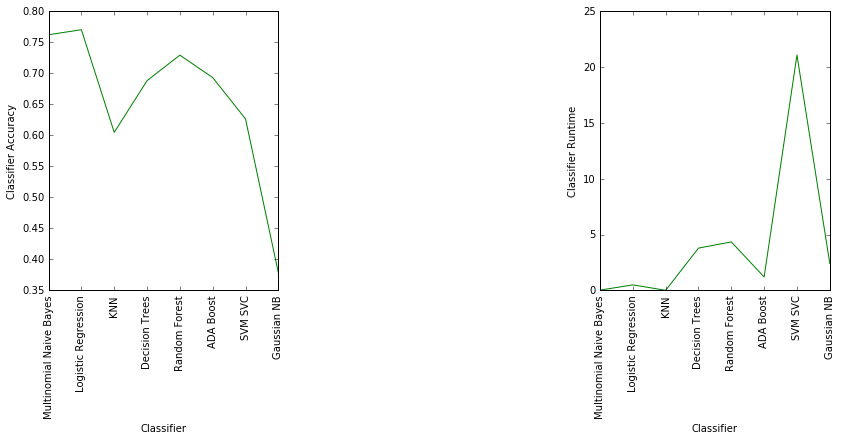

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

print (clf_stats[['Classifier','Accuracy','Runtime']].sort(['Accuracy'], ascending=[False]))
#Plot performance measures of classifiers

x=range(1,(len(clf_stats.Classifier)+1))
plt.figure(1,figsize=(14, 5))

plt.subplot(131)
plt.xlabel('Classifier')
plt.ylabel('Classifier Accuracy')
plt.plot(x, clf_stats['Accuracy'],color='g')
plt.xticks(x,clf_stats.Classifier,rotation=90)

plt.subplot(133)
plt.xlabel('Classifier')
plt.ylabel('Classifier Runtime')
plt.plot(x, clf_stats['Runtime'],color='g')
plt.xticks(x,clf_stats.Classifier,rotation=90)    

### Classifying new tweets: Fit model, Clean Tweet, Predict Mood
#### Clean incoming new tweet:

In [90]:
# Clean input tweet

def fmt_input_tweet(txt):
    
    # Remove @tweets, numbers, hyperlinks that do not start with letters
    txt = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])"," ",txt)
    #print(txt)
    
    # tokenize into words
    tokens = [word for word in nltk.word_tokenize(txt)]
    #print(tokens)

    # only keep tokens that start with a letter (using regular expressions)
    clean_tokens = [token for token in tokens if re.search(r'^[a-zA-Z]+', token)]
    #print('clean_tokens:\n',clean_tokens)

    # stem the tokens
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
    #print('stemmed_tokens:\n',stemmed_tokens)

    #Lemmatizing
    lemmatizer = nltk.WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(t) for t in stemmed_tokens]
    #print('lemmatizer : \n',lem_tokens)
    
    #Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')

    # stem the stopwords
    stemmed_stops = [stemmer.stem(t) for t in stopwords]

    # remove stopwords from stemmed/lemmatized tokens
    lem_tokens_no_stop = [stemmer.stem(t) for t in lem_tokens if t not in stemmed_stops]

    # remove words whose length is <3
    clean_lem_tok = [e for e in lem_tokens_no_stop if len(e) >= 3]
    #print('clean_lem_tok: ',clean_lem_tok)
    
    # Detokenize new tweet for vector processing
    new_formatted_tweet=" ".join(clean_lem_tok)
    #print('new_formatted_tweet: ',new_formatted_tweet)
    
    return new_formatted_tweet
    

### Classify incoming new tweet:

In [91]:
# Logistic Regression performs better. So it will automatically used as an appropriate classifier

# Vectorize, fit, transform. Select model randomly
vect = CountVectorizer(stop_words='english', analyzer="word", min_df = 2, max_df = 0.8)
X_dtm = vect.fit_transform(X)
feat_dtm = vect.get_feature_names()

# Select the best performing classifier
Call_clf = str(clf_stats[['Callable','Accuracy']].sort(['Accuracy'], ascending=[False]).head(1).iloc[:,(0)])
temp = Call_clf.__repr__()
Call_clf = temp[temp.index('c'):(temp.index(')'))+1]
print('Model :',temp[(temp.index('=') + 1) : temp.index('(')])
exec(Call_clf)
clf.fit(X_dtm.toarray(), y) 

def classify_new_tweet(new_twt):  

    fmt_twt = fmt_input_tweet(new_twt)
    fmt_twt_dtm = vect.transform([fmt_twt])[0]
    #print('Formatted Tweet :',fmt_twt)
    pred = clf.predict(fmt_twt_dtm.toarray())

    def mood(x):
        return {
            0: 'negative',
            1: 'positive',
            2: 'neutral'
        }[x]

    print('Mood of the incoming tweet is:',mood(pred[0]))

Model :  LogisticRegression


In [92]:
twt='@united I am sick!! https://www.abc.com'
classify_new_tweet(twt)

Mood of the incoming tweet is: negative


In [93]:
# Predict performance of random prediction. Testing for positive classes.
X_random = dft[dft['target'] == 1].data
X_random_dtm = vect.transform(X_random)
y_random_pred = clf.predict(X_random_dtm)
accuracy = metrics.accuracy_score(y, y_random_pred)
print('Accuracy of random prediction : ',accuracy)

ValueError: Found arrays with inconsistent numbers of samples: [ 2363 14640]

### Plot Classification Boundary for Logistic Regression:

In [ ]:
# Scatter plot classification boundary

h = .02  # step size in the mesh

logreg = LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_dtm, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_dtm[:, 0].min() - .5, X_dtm[:, 0].max() + .5
y_min, y_max = X_dtm[:, 1].min() - .5, X_dtm[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()